# **PROJECT CONTENT**


1. display basic information
2. null check
3. what to do with nulls - complete or throw away
4. checking the characteristic values
5. data visualization
6. boxplot
7. for categorical variables check value
8. onehotencoding vs labelencoding
9. checking outliers for continuous variables
10. standardization / normalization
11. model
12. pipeline



#**Libraries import**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import shapiro
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from pandas.core.common import random_state
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

#**Loading data**

In [4]:
df = pd.read_csv("/content/US_honey_dataset_updated.csv", sep = ',')
df.head(5)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


delete the column Unnamed

In [5]:
df=df.drop(df.columns[0], axis=1)

In [6]:
df.head(5)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


#**1.Displaying basic information** 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB



*CONCLUSIONS:*
Extracting information from the data shows what types of variables we are dealing with

#**2.Null check**

In [8]:
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64


*CONCLUSIONS:* No null values, we do not take any additional action

# **3. Answer the question what to do with nulls - complete or throw away?**


In the case of implemented data, we are not dealing with null values

Null variables will be overwritten in the pipeline.

#**4. Checking the characteristic values ​​**

In [9]:
df.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


# **5. Data visualization**

In [10]:
df1 = df.sort_values(by=['production'], ascending=False).reset_index(drop=True)

In [11]:
df1.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,California,420000,93,39060000,4687000,60.0,23436000,1995
1,California,450000,83,37350000,12326000,62.0,23157000,1998
2,NorthDakota,390000,90,35100000,8424000,135.0,47385000,2008
3,NorthDakota,450000,77,34650000,7623000,137.0,47471000,2009
4,NorthDakota,370000,91,33670000,8418000,81.0,27273000,2005


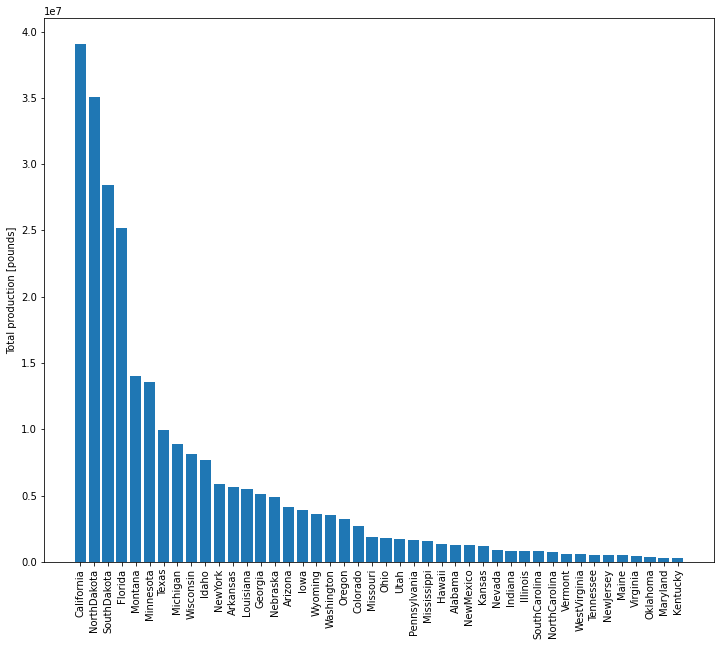

In [12]:
fig, ax=plt.subplots(figsize=(12,10))
ax.bar(df1['state'], df1['production'])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Total production [pounds]')

plt.show()

*CONCLUSIONS:* California has the highest total honey production

In [13]:
df2 = df.sort_values(by=['average_price'], ascending=False).reset_index(drop=True)

In [14]:
df2.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,NewJersey,13000,28,167000,167000,874.0,3181000,2017
1,NewJersey,12000,27,198000,198000,709.0,2297000,2016
2,Virginia,5000,38,30000,30000,585.0,1112000,2016
3,Virginia,6000,35,46000,46000,577.0,1212000,2017
4,Virginia,6000,38,50000,50000,553.0,1261000,2015


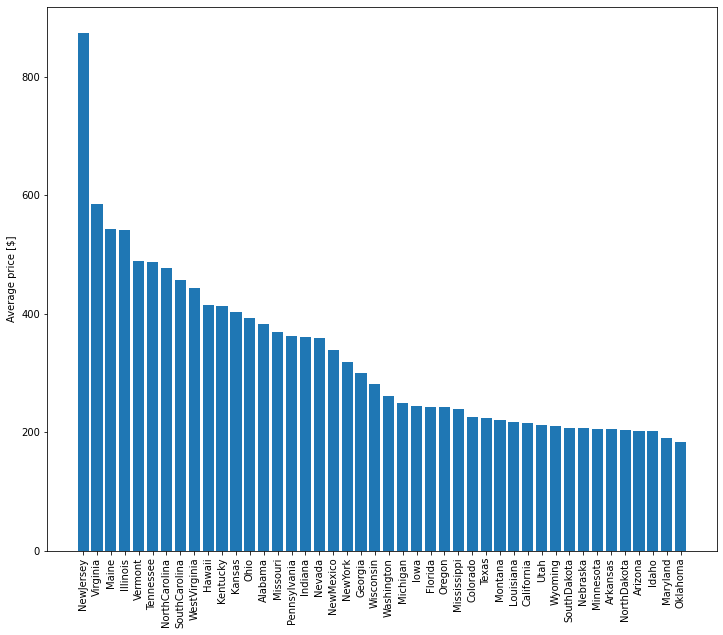

In [15]:
fig, ax=plt.subplots(figsize=(12,10))
ax.bar(df2['state'], df2['average_price'])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Average price [$]')

plt.show()

*CONCLUSIONS:* Newjersey has the highest unit selling price

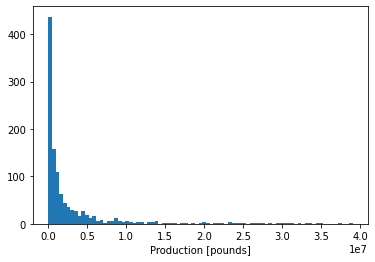

In [16]:
fig, ax=plt.subplots()
ax.hist(df['production'], bins='auto')
ax.set_xlabel('Production [pounds]')

plt.show()

*CONCLUSIONS:* visualization of data using a histogram indicates the lack of normal distribution of data

# **6.Outlier analysis using boxplot**

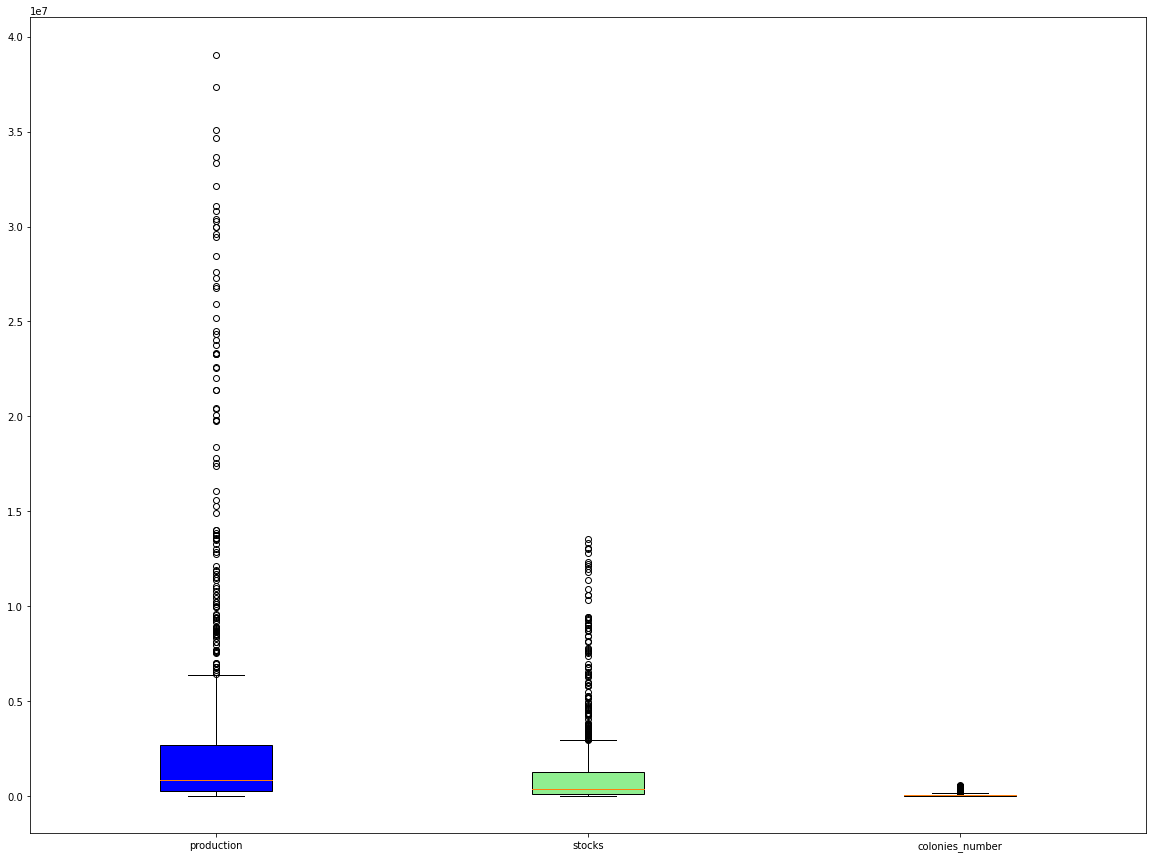

In [17]:
fig, ax=plt.subplots(figsize=(20,15))

box=ax.boxplot([df['production'].dropna(),
                df['stocks'].dropna(),
                df['colonies_number'].dropna()],
               patch_artist=True)

ax.set_xticklabels(['production', 'stocks', 'colonies_number'])

colors=['blue', 'lightgreen', 'red']

for patch, color in zip(box['boxes'], colors):
  patch.set_facecolor(color)


plt.show()

*CONCLUSIONS:* 
Thanks to the use of boxplot, you can observe the upper outliers, the upper or third quartile, the median or the second quartile and the lower or first quartile

# **7. Checking values ​​for categorical variables**

In [18]:
df['colonies_number'].value_counts()

7000      69
6000      50
8000      49
9000      41
5000      36
          ..
410000     1
128000     1
510000     1
180000     1
137000     1
Name: colonies_number, Length: 189, dtype: int64

#**8.What to do with categorical variables?**
OneHotEncoder

In [19]:
df_state = df['state'] # wybranie zmiennych kategorycznych
df_state = pd.get_dummies(data=df_state) # stworzenie dummies
df_state = df.join(df_state) #polaczenie oryginalnego df z dummies

df_state.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,Alabama,Arizona,...,SouthDakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
0,Alabama,16000,58,928000,28000,62.0,575000,1995,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,0,0,...,0,0,0,0,0,0,0,0,0,0
3,California,420000,93,39060000,4687000,60.0,23436000,1995,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,0,0,...,0,0,0,0,0,0,0,0,0,0


# **9. Checking for outliers for variables**

In [20]:
df.quantile([0.01,0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0.01,3000.0,27.00,24140.0,18140.0,1.6914,229840.0,1995.0
0.05,5000.0,33.00,52700.0,41700.0,2.3200,372100.0,1996.0
0.25,9000.0,45.00,246000.0,112500.0,70.0000,1008000.0,2001.0
0.50,26000.0,57.00,828000.0,370000.0,128.0000,2281000.0,2008.0
0.75,69000.0,71.00,2700000.0,1253500.0,193.0000,5704000.0,2015.0
0.95,261500.0,96.30,13509000.0,5240900.0,360.3000,23097500.0,2020.0
0.99,477200.0,118.86,30000000.0,10859980.0,486.6000,50342100.0,2021.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

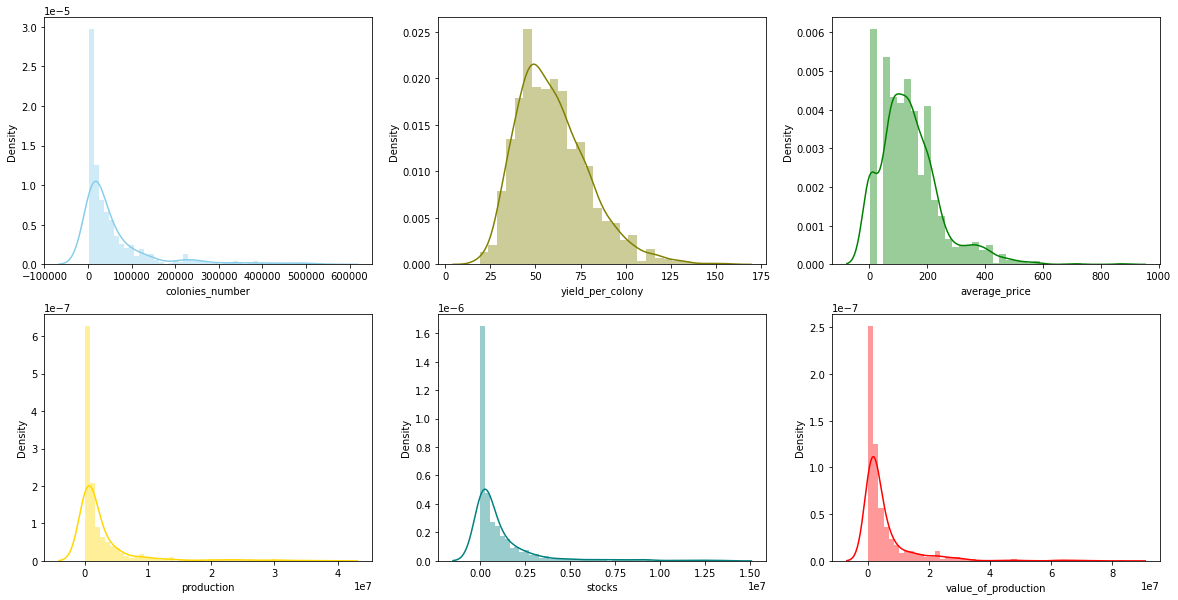

In [21]:
f, axes = plt.subplots(2,3, figsize=(20, 10))
sns.distplot(df['colonies_number'], color='skyblue', ax=axes[0, 0])
sns.distplot(df['yield_per_colony'], color='olive', ax=axes[0, 1])
sns.distplot(df['production'], color='gold', ax=axes[1, 0])
sns.distplot(df['stocks'], color='teal', ax=axes[1, 1])
sns.distplot(df['average_price'], color='green', ax=axes[0, 2])
sns.distplot(df['value_of_production'], color='red', ax=axes[1, 2])
plt.show()



*   Checking whether the set has a normal distribution D'Agostino-Pearson test




In [22]:
results = []
for feature in df.columns:
    alpha = 0.05
    if df[feature].dtype != 'object':
      p_value = scipy.stats.normaltest(df[feature])
      results.append([feature, p_value])
      if(p_value[1] < alpha):
          print('For a variable \'' + feature +'\' reject the null hypothesis. The variable is NOT normally distributed. P-value:', p_value)
      else:
          print('For a variable \'' + feature +'\' no grounds for rejecting the null hypothesis were found. The variable COMES from a normal distribution. P-value:', p_value)

For a variable 'colonies_number' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=645.2031249355281, pvalue=7.869036629048983e-141)
For a variable 'yield_per_colony' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=140.76888496875875, pvalue=2.706605856481851e-31)
For a variable 'production' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=845.8075130005496, pvalue=2.16387503184106e-184)
For a variable 'stocks' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=796.9122152103691, pvalue=8.968321867381252e-174)
For a variable 'average_price' reject the null hypothesis. The variable is NOT normally distributed. P-value: NormaltestResult(statistic=322.6840965797898, pvalue=8.512139428408907e-71)
For a variable 'value_of_production' reject the null hypothesis. The var

In [72]:
podsumowanie = pd.DataFrame(results)
podsumowanie.columns = ['variable_name', 'P-value']
podsumowanie.set_index('variable_name', inplace = True)
podsumowanie.sort_values('P-value', ascending = False, inplace = True)
podsumowanie

,P-value
variable_name,
value_of_production,"(937.699008169827, 2.4057335943262457e-204)"
year,"(915.8097069670775, 1.362852626180846e-199)"
production,"(845.8075130005496, 2.16387503184106e-184)"
stocks,"(796.9122152103691, 8.968321867381252e-174)"
colonies_number,"(645.2031249355281, 7.869036629048983e-141)"
average_price,"(322.6840965797898, 8.512139428408907e-71)"
yield_per_colony,"(140.76888496875875, 2.706605856481851e-31)"


*  Checking if the above code worked correctly on a randomly selected part of the data

In [73]:
stats, p = normaltest(df['production'])
print(f'CONCLUSIONS:' f'\n'
      f'Characteristic value for the test: {stats}', f'\n'
      f'Value p: {p}')
if p > 0.05:
    print ("The distribution appears to be of the normal type")
else:
  print ("The distribution does not appear to be of the normal type")


CONCLUSIONS:
Characteristic value for the test: 845.8075130005496 
Value p: 2.16387503184106e-184
The distribution does not appear to be of the normal type


In [74]:
stats, p = normaltest(df['colonies_number'])
print(f'CONCLUSIONS:' f'\n'
      f'Characteristic value for the test: {stats}', f'\n'
      f'Value p: {p}')
if p > 0.05:
    print ("The distribution appears to be of the normal type")
else:
  print ("The distribution does not appear to be of the normal typ")


CONCLUSIONS:
Characteristic value for the test: 645.2031249355281 
Value p: 7.869036629048983e-141
The distribution does not appear to be of the normal typ



*  Checking if the set has a normal distribution with the Shapiro-Wilk test

In [75]:
stats, p = shapiro(df['production'])
print(f'CONCLUSIONS:' f'\n'
      f'Characteristic value for the test: {stats}', f'\n'
      f'Value p: {p}')
if p > 0.05:
    print ("The distribution appears to be of the normal type")
else:
  print ("The distribution does not appear to be of the normal typ")

CONCLUSIONS:
Characteristic value for the test: 0.5220077037811279 
Value p: 0.0
The distribution does not appear to be of the normal typ


*   Determination of the skewness of the distribution




In [27]:
df.agg(['mean', 'median'])

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
median,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000


*CONCLUSIONS:* According to the assumptions of normal distribution, the mean value and the median should be close or equal to each other. Then we can suspect the distribution of the variable to be skewed.

Differences in values ​​indicate skewness of the distribution.

consecutively:

> mean less than the median - left-skewed distribution (extended left arm of the distribution)
> mean greater than the median - right-skewed distribution (extended right arm of the distribution)

*   The coefficient of skewness of the distribution

In [28]:
df.skew()

<ipython-input-28-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


colonies_number        2.724796
yield_per_colony       0.895759
production             3.556899
stocks                 3.322866
average_price          1.411339
value_of_production    3.894655
year                   0.045198
dtype: float64

*CONCLUSIONS:*


> A coefficient of 0 is a symmetrical distribution.

> A coefficient with a positive value is a right-skewed distribution (extended right arm of the distribution; mean greater than the median).

#10. Z-score Standardization

---



In [29]:
df['production_Zscore'] = (df['production']-df['production'].mean()) / df['production'].std()
df['production_Zscore'].describe()

count    1.115000e+03
mean    -7.647097e-17
std      1.000000e+00
min     -5.105494e-01
25%     -4.684721e-01
50%     -3.638185e-01
75%     -2.720062e-02
max      6.510954e+00
Name: production_Zscore, dtype: float64

In [30]:
df['stocks_Zscore'] = (df['stocks']-df['stocks'].mean()) / df['stocks'].std()
df['stocks_Zscore'].describe()

count    1.115000e+03
mean    -3.823548e-17
std      1.000000e+00
min     -5.677451e-01
25%     -5.172463e-01
50%     -3.916093e-01
75%      3.945972e-02
max      6.036613e+00
Name: stocks_Zscore, dtype: float64

#**11. model**

In [31]:
df_state.head(5)

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year,Alabama,Arizona,...,SouthDakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
0,Alabama,16000,58,928000,28000,62.0,575000,1995,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995,0,0,...,0,0,0,0,0,0,0,0,0,0
3,California,420000,93,39060000,4687000,60.0,23436000,1995,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X = df[['colonies_number']]

In [33]:
y = df['production']


*Multivariate Linear Regression*

In [34]:
model = LinearRegression()

In [35]:
model.fit(X,y)

LinearRegression()

 
free expression θ0

In [36]:
model.intercept_

90424.59152508387

factor at x

In [37]:
model.coef_

array([44.21696061])

In [38]:
model.coef_[0]

44.21696060629328

In [39]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size =0.2, random_state = 333)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(669, 1)
(223, 1)
(223, 1)


In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred_train = model.predict(X_train)


# **Metrics**

## R2

In [44]:
r2_train = r2_score(y_train, y_pred_train )
r2_train

0.5406786534385772

In [45]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 4185885.20633773,   505947.02067491,   895587.53445097,
        2021215.6853596 ,   592533.80151404,   376066.84941622,
        2670616.54165304,   592533.80151404,   635827.1919336 ,
        1415108.21948573,   549240.41109447, 11199414.45430687,
         332773.45899666,  4488938.93927467,   376066.84941622,
        2410856.19913566,   419360.23983579,  2324269.41829654,
         722413.97277272,   376066.84941622,   332773.45899666,
       21373361.20290408,  7043248.97402886,   462653.63025535,
        5311513.35724636,  1328521.4386466 ,  9467678.83752436,
         895587.53445097,   376066.84941622,   549240.41109447,
         549240.41109447,   289480.0685771 ,   765707.36319229,
        4748699.28179204,  4142591.81591817,  3276724.00752692,
         419360.23983579,   982174.3152901 ,   549240.41109447,
        1328521.4386466 ,  1891335.51410091,   809000.75361185,
        4835286.06263117,   852294.14403141,   419360.23983579,
         419360.23983579,  1415108.21948

In [46]:
r2_val = r2_score(y_val, y_pred_val)
r2_val

0.46047649318239625

##**MAE**

In [47]:
y_pred_train


array([ 4532232.32969423,  1415108.21948573,   592533.80151404,
        2670616.54165304,  4359058.76801598,   376066.84941622,
         462653.63025535, 14662885.68787187,   809000.75361185,
        1674868.5620031 ,   938880.92487054,  5441393.52850504,
       13580550.92738281,  1544988.39074441,   462653.63025535,
         982174.3152901 ,  1155347.87696835,  3320017.39794648,
         852294.14403141,   765707.36319229,   765707.36319229,
         505947.02067491, 14013484.83157844,   246186.67815754,
        2540736.37039435,  9034744.93332874,   852294.14403141,
       10550013.59801343,  1285228.04822704,   549240.41109447,
        6956662.19318973,   938880.92487054,   895587.53445097,
         549240.41109447,   505947.02067491,  1718161.95242266,
        3926124.86382035,  3146843.83626823,   549240.41109447,
         289480.0685771 , 14879352.63996969,   505947.02067491,
         635827.1919336 ,  1198641.26738791,  1328521.4386466 ,
        4705405.89137248,   376066.84941

In [48]:
mea_train = mean_absolute_error(y_train, y_pred_train)
mea_train

1917388.753526405

In [49]:
mae_val = mean_absolute_error(y_val, y_pred_val)
mae_val

1564903.578308934

## MAPE

In [50]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

14232640939327.277

In [51]:
mse_val = mean_squared_error(y_val, y_pred_val)
mse_val

10869544889115.314

##RMSE

In [52]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_train

3772617.253224514

In [53]:
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
rmse_val

3296899.2840417973

##Max error


In [54]:
max_err_train = max_error(y_train, y_pred_train)
max_err_train 

20717176.126465306

In [55]:
max_err_val = max_error(y_val, y_pred_val)
max_err_val

19218964.628077827

# **12. pipeline**

In [56]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size =0.2, random_state = 333)

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=23)

In [58]:
cols_numerical = ['colonies_number']

In [59]:
class HoneyProductionTransformer (BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):

    # self.productionp95 = X['production'].quantile(0.95)
    # self.productionp05 = X['production'].quantile(0.05)
    # self.productionmean = X['production'].mean()

    self.colonies_numberp95 = X['colonies_number'].quantile(0.95)
    self.colonies_numberp05 = X['colonies_number'].quantile(0.05)
    self.colonies_numbermean = X['colonies_number'].mean()

    # self.average_pricep95 = y['average_price'].quantile(0.95)
    # self.average_pricep05 = y['average_price'].quantile(0.05)
    # self.average_pricemean = y['average_price'].mean()
   
    return self
  
  def transform(self, X, y=None):
    # X[(X['production'] >self.productionp95) | (X['production'] < self.productionp05)] = self.productionmean
    X[(X['colonies_number'] >self.colonies_numberp95) | (X['colonies_number'] < self.colonies_numberp05)] = self.colonies_numbermean
    # y[(y['average_price'] >self.average_pricep95) | (y['average_price'] < self.average_pricep05)] = self.average_pricemean
    return X

In [60]:
transformer_numerical = Pipeline(steps = [
    ('outlier', HoneyProductionTransformer()),
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

In [61]:
preprocessor = ColumnTransformer(transformers =[
    ('numerical', transformer_numerical, cols_numerical),
])


In [62]:
pipe = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', LinearRegression()) 
])

In [63]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('outlier',
                                                  HoneyProductionTransformer()),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['colonies_number'])])

In [64]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   HoneyProductionTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['colonies_number'])])),
                ('model', LinearRegression())])

In [65]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('outlier',
                                                                   HoneyProductionTransformer()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['colonies_number'])])),
                ('model', LinearRegression())])

In [66]:
y_pred_train = pipe.predict(X_train)

In [67]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.3205283820249283

In [68]:
y_pred_val = pipe.predict(X_val)

In [69]:
r2_val = r2_score(y_val, y_pred_val)
r2_val

0.18438435816078236